In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as sg 
from scipy.fft import fft, fftfreq, fftshift

audio = 'output.wav' 
fs, señal = wav.read(audio) 

if señal.ndim > 1:
    señal = np.mean(señal, axis=1) 

print(f'Frecuencia de muestreo: {fs} Hz')
print(f'Duración: {len(señal) / fs} segundos')
print(f'Forma de la señal: {señal.shape}')
print(" me mie")

Frecuencia de muestreo: 44100 Hz
Duración: 45.08734693877551 segundos
Forma de la señal: (1988352,)


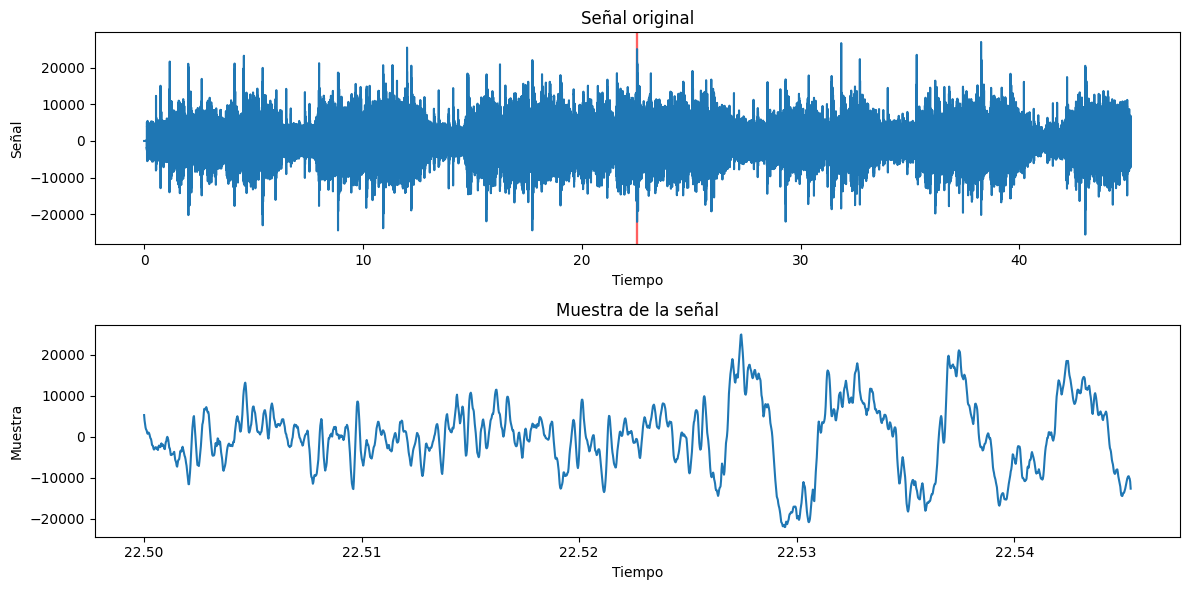

In [78]:
t = np.arange(len(señal)) / fs #eje x

N = 2000 # numero de muestras
t_start = 22.5 
t_end = t_start + N/fs 
ventana = (t >= t_start) & (t <= t_end) 


muestra, t_muestra = sg.resample(señal[ventana], N, t[ventana]) 


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, señal)
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.title('Señal original')
plt.axvspan(t_start, t_end, alpha=0.5, color='red') 

plt.subplot(2, 1, 2)
plt.plot(t_muestra, muestra)
plt.xlabel('Tiempo')
plt.ylabel('Muestra')
plt.title('Muestra de la señal')

plt.tight_layout()
plt.show()

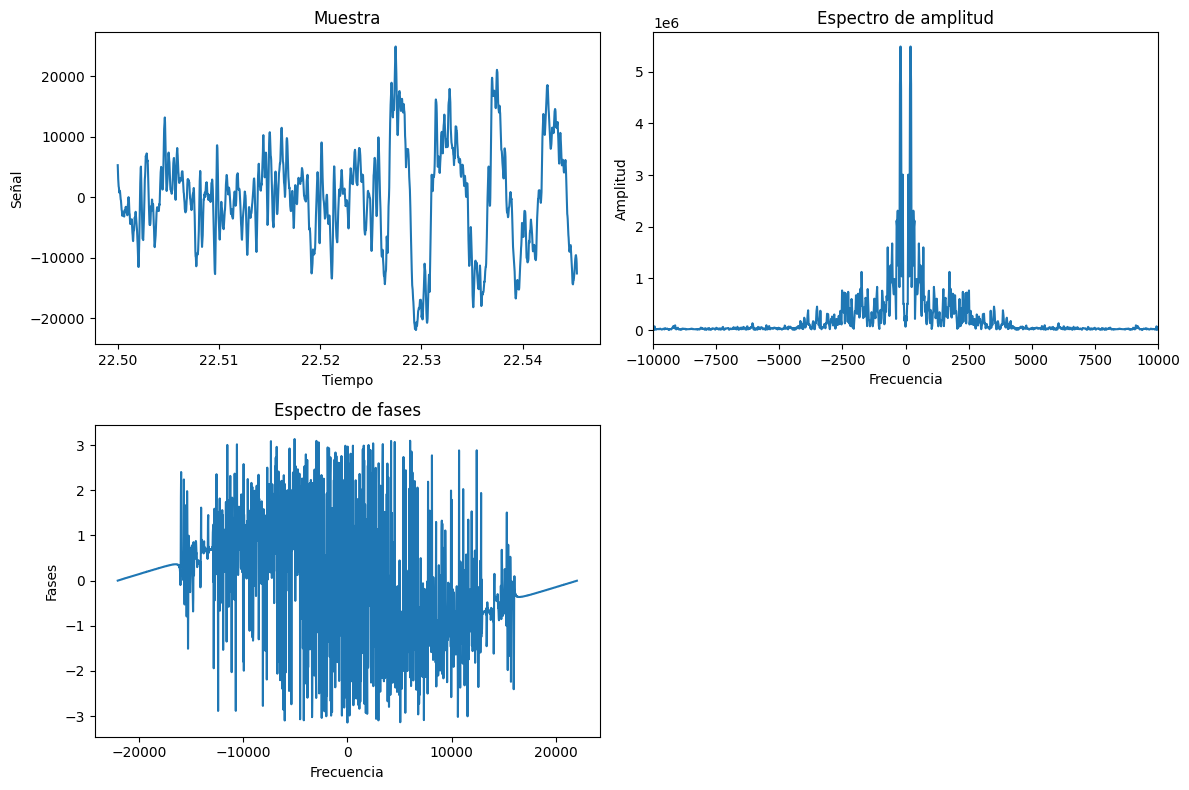

In [81]:
T = t_muestra[1] - t_muestra[0]  # Sampling interval
y = muestra # Signal array

yf = fft(y) 
xf = fftfreq(N, T) # f correspondientes a las componentes de la señal transformada 
xf = fftshift(xf) # para centrar las frecuencias positivas y negativas 
yf = fftshift(yf)

amp = np.abs(yf) # Amplitud 
phs = np.angle(yf) #fases

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t_muestra, muestra)
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.title('Muestra')

plt.subplot(2, 2, 2)
plt.plot(xf, amp)
plt.xlim(-10000,10000)
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de amplitud')

plt.subplot(2, 2, 3)
plt.plot(xf, phs)
plt.xlabel('Frecuencia')
plt.ylabel('Fases')
plt.title('Espectro de fases')

plt.tight_layout()
plt.show()